In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Make the figures a bit bigger
#plt.rcParams['figure.figsize'] = (5, 5) 

# Load training data

In [3]:
from keras.datasets import mnist

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

Using TensorFlow backend.


('X_train original shape', (60000, 28, 28))
('y_train original shape', (60000,))
('X_test original shape', (10000, 28, 28))
('y_test original shape', (10000,))


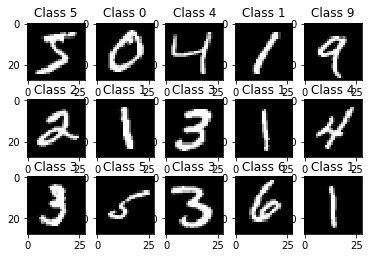

In [4]:
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

## Format the data for training
Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector. We'll also scale the inputs to be in the range [0-1] rather than [0-255]

In [5]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)
#print("Training matrix example", X_train[0])

('Training matrix shape', (60000, 784))
('Testing matrix shape', (10000, 784))


In [6]:
from keras.utils import np_utils
nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print("Training matrix example")
print(Y_train[0:5])

Training matrix example
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


# Build the neural network
Build the neural-network. Here we'll do a simple 3 layer fully connected network. 
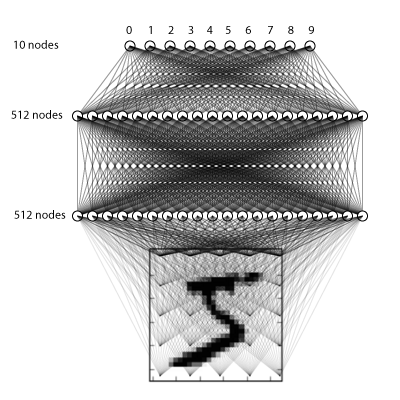

In [7]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(input_dim=784, units=500))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) 
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

model1 = Sequential()
model1.add(Dense(input_dim=784, units=500))
model1.add(Activation('sigmoid'))
model1.add(Dense(units=500))
model1.add(Activation('sigmoid'))
model1.add(Dense(10))
model1.add(Activation('softmax')) 
model1.compile(loss='mse', optimizer=SGD(lr=0.1), metrics=['accuracy'])

model2 = Sequential()
model2.add(Dense(input_dim=784, units=500))
model2.add(Activation('sigmoid'))
model2.add(Dense(units=500))
model2.add(Activation('sigmoid'))
model2.add(Dense(10))
model2.add(Activation('softmax')) 
model2.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1), metrics=['accuracy']) 

# Train the model!

In [8]:
#history = model.fit(X_train, Y_train, batch_size=100, epochs=10, verbose=1, validation_data=(X_test, Y_test))
history1 = model1.fit(X_train, Y_train, batch_size=100, epochs=20, verbose=1, validation_data=(X_test, Y_test))
history2 = model2.fit(X_train, Y_train, batch_size=100, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s - loss: 0.0899 - acc: 0.1290 - val_loss: 0.0896 - val_acc: 0.1181
Epoch 2/10
60000/60000 [==============================] - 3s - loss: 0.0894 - acc: 0.1655 - val_loss: 0.0892 - val_acc: 0.1834
Epoch 3/10
60000/60000 [==============================] - 3s - loss: 0.0890 - acc: 0.2123 - val_loss: 0.0887 - val_acc: 0.2505
Epoch 4/10
60000/60000 [==============================] - 3s - loss: 0.0885 - acc: 0.2543 - val_loss: 0.0882 - val_acc: 0.3460
Epoch 5/10
60000/60000 [==============================] - 3s - loss: 0.0880 - acc: 0.2832 - val_loss: 0.0877 - val_acc: 0.3113
Epoch 6/10
60000/60000 [==============================] - 3s - loss: 0.0874 - acc: 0.2840 - val_loss: 0.0870 - val_acc: 0.4189
Epoch 7/10
60000/60000 [==============================] - 3s - loss: 0.0866 - acc: 0.3027 - val_loss: 0.0861 - val_acc: 0.2603
Epoch 8/10
60000/60000 [==============================] - 3s 

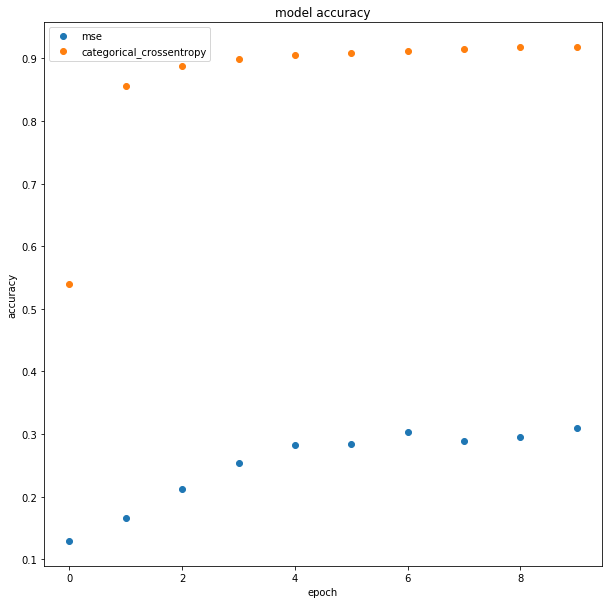

In [14]:
plt.rcParams['figure.figsize'] = (10, 10) 

plt.subplot(111)
plt.plot(history1.history['acc'], 'o')
plt.plot(history2.history['acc'], 'o')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['mse', 'categorical_crossentropy'], loc='upper left')
plt.show()

# Finally, evaluate its performance

In [10]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

('Test score:', 2.3239376998901369)
('Test accuracy:', 0.076799999999999993)
